# Data Analytics for Health - Task 1.1: Exploratory Data Analysis

## Overview
This notebook performs exploratory data analysis (EDA) on four healthcare datasets:
1. **Heart Diagnoses** - Clinical notes and patient information
2. **Laboratory Events Codes** - Lab test results and measurements  
3. **Microbiology Events Codes** - Microbiology test results
4. **Procedure Codes** - Medical procedures and ICD codes

## Objectives
- Load and examine the structure of all four datasets
- Perform data understanding and quality assessment
- Create meaningful distribution plots for key variables
- Identify patterns and characteristics in the healthcare data

---

In [34]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
from datetime import datetime

# Configure settings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Set up file paths
notebook_dir = Path.cwd().resolve()
data_path = (notebook_dir / '..' / '..' / 'Data').resolve()
out_dir = (notebook_dir / '..' / 'plots').resolve()
out_dir.mkdir(parents=True, exist_ok=True)

print("✅ Libraries imported successfully")
print(f"📁 Data path: {data_path}")
print(f"📊 Output directory: {out_dir}")





# Load the first CSV file (heart_diagnoses_1.csv)
first_csv = "heart_diagnoses_1.csv"
df = pd.read_csv(os.path.join(data_path, first_csv))

# Display the head of the dataframe
print(f"Loading {first_csv}:")
print(df.head())


✅ Libraries imported successfully
📁 Data path: /Users/alexandermittet/Library/Mobile Documents/com~apple~CloudDocs/uni_life/UniPi DAD/Data
📊 Output directory: /Users/alexandermittet/Library/Mobile Documents/com~apple~CloudDocs/uni_life/UniPi DAD/data_analytics_4_health_unipi/plots
Loading heart_diagnoses_1.csv:
          note_id  subject_id   hadm_id note_type  note_seq  \
0  10000980-DS-20    10000980  29654838        DS        20   
1  10000980-DS-21    10000980  26913865        DS        21   
2   10002013-DS-8    10002013  24760295        DS         8   
3   10002155-DS-8    10002155  23822395        DS         8   
4  10004457-DS-10    10004457  28723315        DS        10   

             charttime            storetime  \
0  2188-01-06 03:00:00  2188-01-07 23:49:00   
1  2189-07-04 03:00:00  2189-07-04 22:50:00   
2  2160-07-13 03:00:00  2160-07-15 16:59:00   
3  2129-08-19 03:00:00  2129-08-20 15:29:00   
4  2141-08-14 03:00:00  2141-08-14 21:50:00   

                         

## 1. Data Loading

We'll load all four datasets and examine their basic structure to understand what we're working with.


In [35]:
# Load the second CSV file (laboratory_events_codes_2.csv)
second_csv = "laboratory_events_codes_2.csv"
df2 = pd.read_csv(os.path.join(data_path, second_csv))

# Display the head of the second dataframe
print(f"Loading {second_csv}:")
print(df2.head())


Loading laboratory_events_codes_2.csv:
      hadm_id            charttime value  valuenum valueuom  ref_range_lower  \
0  29654838.0  2188-01-04 23:43:00   ___    198.00     IU/L             29.0   
1  29654838.0  2188-01-04 23:43:00     5      5.00    ng/mL              0.0   
2  29654838.0  2188-01-04 23:43:00   ___      0.03    ng/mL              0.0   
3  29654838.0  2188-01-05 06:56:00   1.2      1.20      NaN              0.9   
4  29654838.0  2188-01-05 06:56:00  12.8     12.80      sec              9.4   

   ref_range_upper      flag                          label  fluid  \
0           201.00       NaN           Creatine Kinase (CK)  Blood   
1            10.00       NaN  Creatine Kinase, MB Isoenzyme  Blood   
2             0.01  abnormal                     Troponin T  Blood   
3             1.10  abnormal                        INR(PT)  Blood   
4            12.50  abnormal                             PT  Blood   

            examination_group analysis_batch_id qc_flag ref

In [36]:
# Load all four datasets
datasets = {
    "Heart Diagnoses": "heart_diagnoses_1.csv",
    "Laboratory Events": "laboratory_events_codes_2.csv", 
    "Microbiology Events": "microbiology_events_codes_3.csv",
    "Procedure Codes": "procedure_code_4.csv"
}

# Load datasets into DataFrames
dfs = {}
for name, filename in datasets.items():
    filepath = data_path / filename
    dfs[name] = pd.read_csv(filepath)
    print(f"✅ Loaded {name}: {dfs[name].shape[0]:,} rows × {dfs[name].shape[1]} columns")

# Assign to individual variables for convenience
df1 = dfs["Heart Diagnoses"]  # heart_diagnoses
df2 = dfs["Laboratory Events"]  # laboratory_events
df3 = dfs["Microbiology Events"]  # microbiology_events  
df4 = dfs["Procedure Codes"]  # procedure_codes

print(f"\n📊 All datasets loaded successfully!")


✅ Loaded Heart Diagnoses: 4,864 rows × 25 columns
✅ Loaded Laboratory Events: 978,503 rows × 14 columns
✅ Loaded Microbiology Events: 15,587 rows × 14 columns
✅ Loaded Procedure Codes: 14,497 rows × 6 columns

📊 All datasets loaded successfully!


## 2. Data Understanding

Let's examine the structure, data types, and basic characteristics of each dataset to understand what we're working with.


In [37]:
# Comprehensive data overview for all datasets
def analyze_dataset(df, name):
    """Analyze a single dataset and return key information"""
    print(f"\n{'='*60}")
    print(f"📋 {name.upper()}")
    print(f"{'='*60}")
    
    # Basic info
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Data types
    print(f"\n📊 Data Types:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"  {dtype}: {count} columns")
    
    # Missing values
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    
    print(f"\n❓ Missing Values:")
    if missing.sum() == 0:
        print("  No missing values")
    else:
        missing_summary = pd.DataFrame({
            'Missing Count': missing,
            'Missing %': missing_pct
        }).sort_values('Missing Count', ascending=False)
        print(missing_summary[missing_summary['Missing Count'] > 0].head(10))
    
    # Sample data
    print(f"\n👀 Sample Data:")
    print(df.head(3).to_string())
    
    return {
        'shape': df.shape,
        'dtypes': df.dtypes,
        'missing': missing,
        'sample': df.head(3)
    }

# Analyze all datasets
dataset_info = {}
for name, df in dfs.items():
    dataset_info[name] = analyze_dataset(df, name)

print(f"\n🎯 Summary: Analyzed {len(dataset_info)} datasets")



📋 HEART DIAGNOSES
Shape: 4,864 rows × 25 columns
Memory usage: 31.11 MB

📊 Data Types:
  object: 19 columns
  int64: 4 columns
  float64: 2 columns

❓ Missing Values:
                 Missing Count  Missing %
dod                       4466      91.82
anchor_year               3501      71.98
age                       3501      71.98
gender                    3501      71.98
chief_complaint             12       0.25
invasions                   12       0.25

👀 Sample Data:
          note_id  subject_id   hadm_id note_type  note_seq            charttime            storetime                                                                                                                                                                                                                                                                                                                                                                                                                                     

## 3. Distribution Analysis

Now we'll create distribution plots for numerical variables in each dataset to understand the data patterns and characteristics.


In [38]:
# Utility function to create clean distribution plots
def create_distribution_plots(df, dataset_name, max_vars=4):
    """
    Create distribution plots for numerical variables in a dataset
    
    Parameters:
    - df: DataFrame to analyze
    - dataset_name: Name for the plot title and filename
    - max_vars: Maximum number of variables to plot
    """
    
    # Get numerical columns, excluding ID-like columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Filter out ID-like columns (high cardinality)
    suitable_vars = []
    for col in numeric_cols:
        unique_ratio = df[col].nunique() / len(df)
        if unique_ratio < 0.8:  # Less than 80% unique values
            suitable_vars.append(col)
    
    if not suitable_vars:
        print(f"⚠️  No suitable numerical variables found in {dataset_name}")
        return
    
    # Limit number of variables
    suitable_vars = suitable_vars[:max_vars]
    
    # Create subplots
    n_vars = len(suitable_vars)
    if n_vars == 1:
        fig, axes = plt.subplots(1, 1, figsize=(10, 6))
        axes = [axes]
    elif n_vars == 2:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    elif n_vars == 3:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    else:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()
    
    fig.suptitle(f'Distribution Analysis - {dataset_name}', fontsize=16, fontweight='bold')
    
    for i, col in enumerate(suitable_vars):
        ax = axes[i]
        data = df[col].dropna()
        
        if len(data) > 0:
            # Create histogram
            ax.hist(data, bins=30, alpha=0.7, density=True, color='skyblue', edgecolor='black')
            
            # Add statistics
            mean_val = data.mean()
            std_val = data.std()
            ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
            
            ax.set_title(f'{col}\\n(n={len(data):,}, μ={mean_val:.2f}, σ={std_val:.2f})')
            ax.set_xlabel(col)
            ax.set_ylabel('Density')
            ax.grid(True, alpha=0.3)
            ax.legend()
        else:
            ax.text(0.5, 0.5, 'No data to plot', ha='center', va='center', transform=ax.transAxes)
    
    # Hide empty subplots
    for i in range(len(suitable_vars), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    
    # Save plot
    try:
        filename = f"{dataset_name.lower().replace(' ', '_')}_distributions.jpg"
        filepath = out_dir / filename
        fig.savefig(filepath, dpi=200, bbox_inches='tight')
        print(f"💾 Saved: {filename}")
    except Exception as e:
        print(f"❌ Could not save plot: {e}")
    
    plt.show()
    
    return suitable_vars

print("🎨 Distribution plotting function ready!")


🎨 Distribution plotting function ready!


🎨 Creating distribution plots for all datasets...

📊 Analyzing Heart Diagnoses...
💾 Saved: heart_diagnoses_distributions.jpg


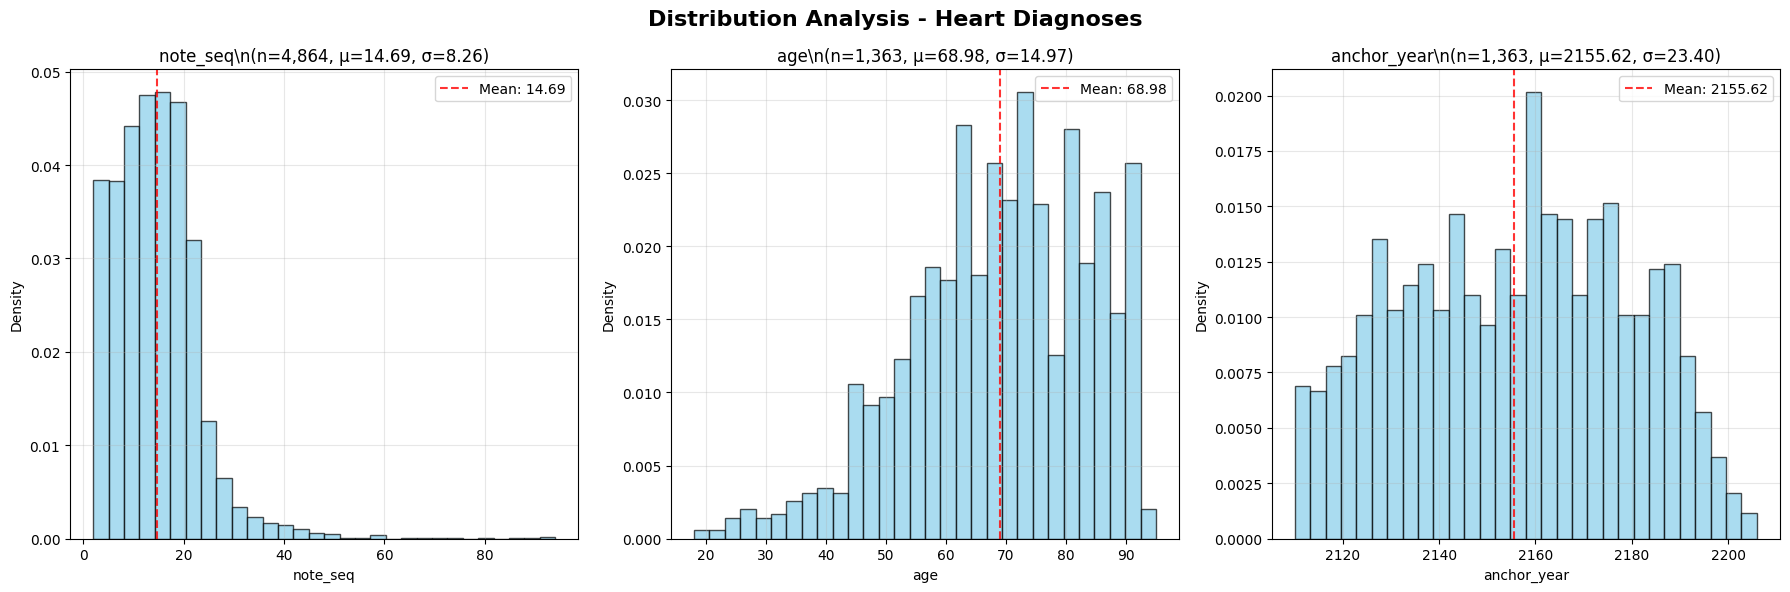


📊 Analyzing Laboratory Events...
💾 Saved: laboratory_events_distributions.jpg


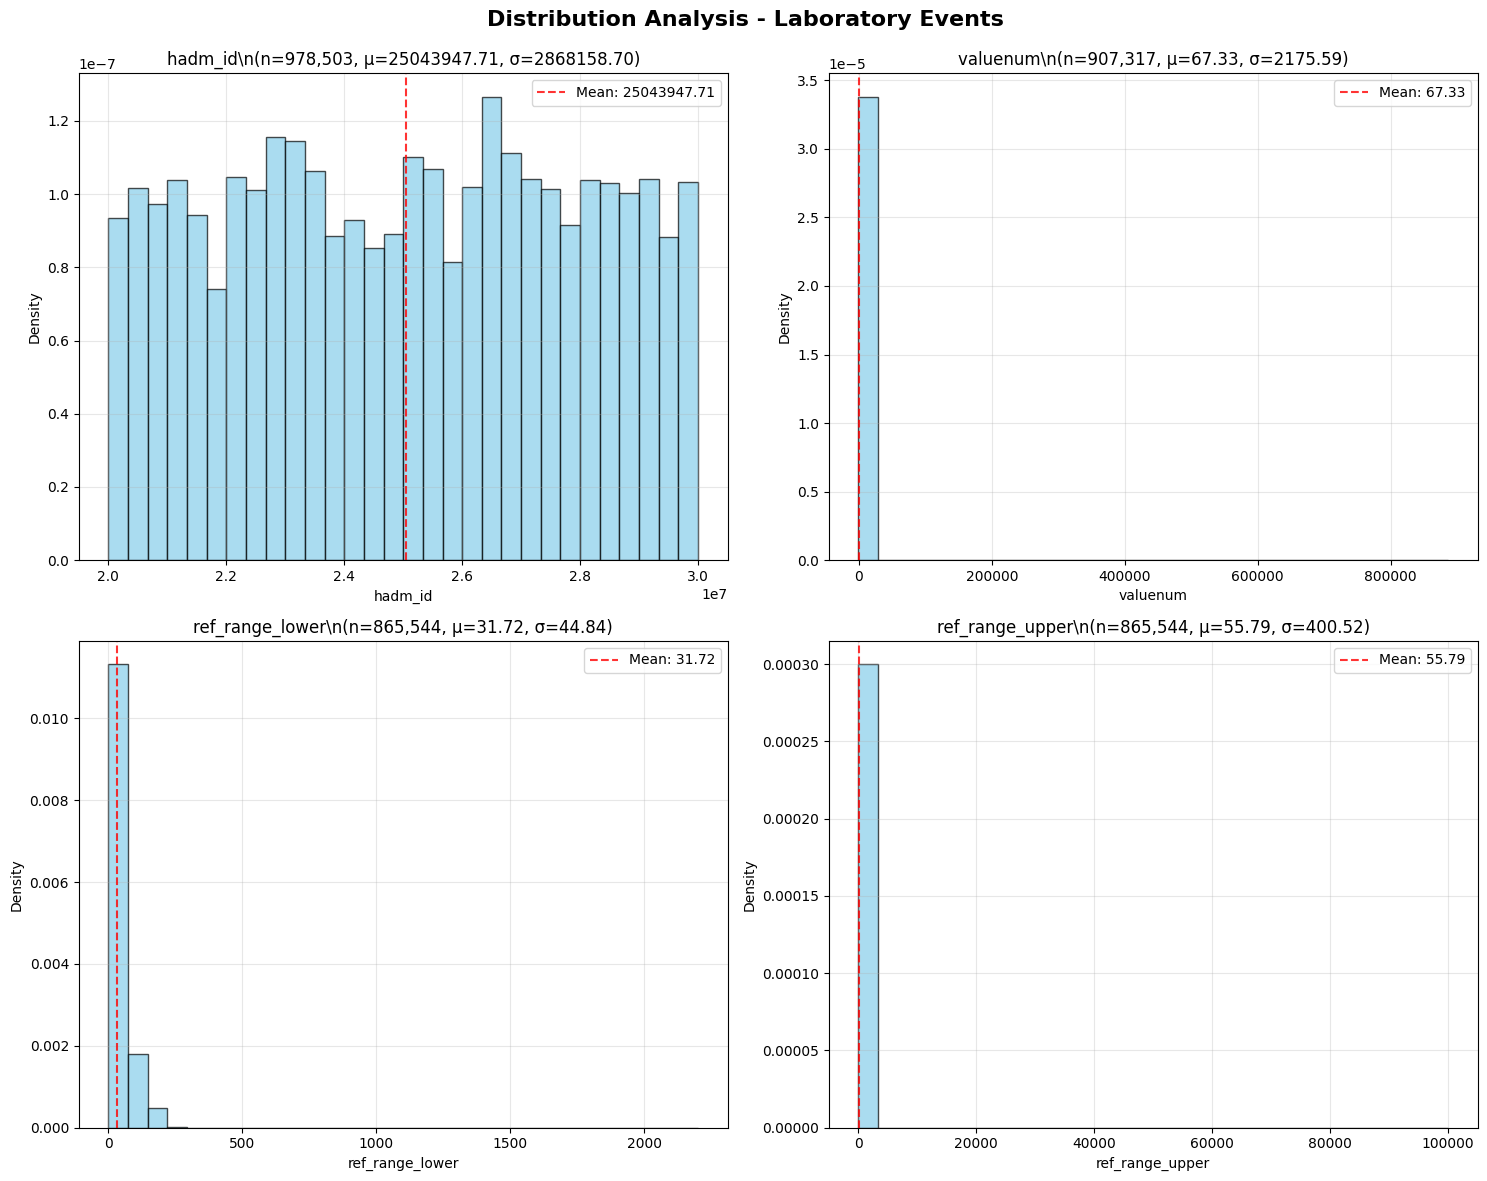


📊 Analyzing Microbiology Events...
💾 Saved: microbiology_events_distributions.jpg


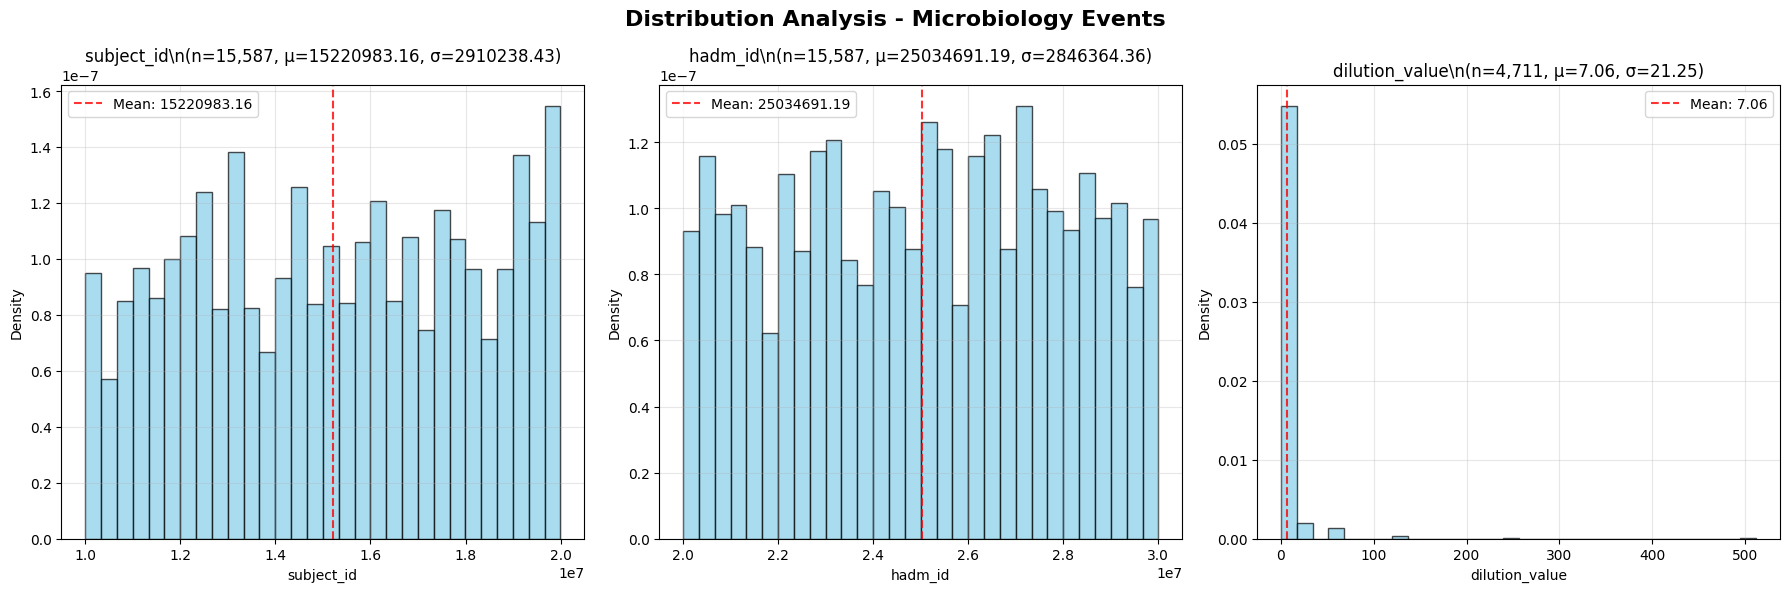


📊 Analyzing Procedure Codes...
💾 Saved: procedure_codes_distributions.jpg


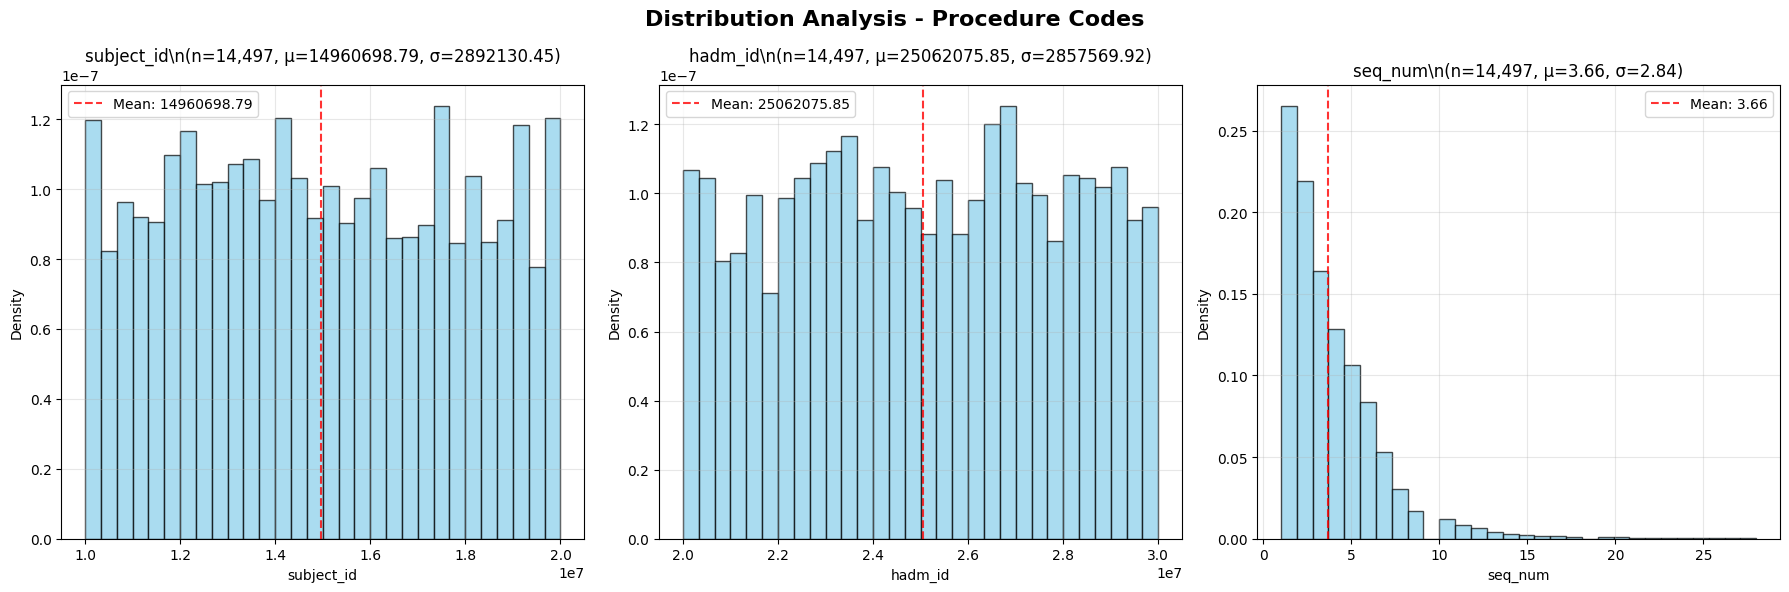


✅ Distribution analysis complete!
📈 Plotted variables summary:
  Heart Diagnoses: note_seq, age, anchor_year
  Laboratory Events: hadm_id, valuenum, ref_range_lower, ref_range_upper
  Microbiology Events: subject_id, hadm_id, dilution_value
  Procedure Codes: subject_id, hadm_id, seq_num


In [39]:
# Generate distribution plots for all datasets
print("🎨 Creating distribution plots for all datasets...")
print("="*60)

plotted_vars = {}
for name, df in dfs.items():
    print(f"\n📊 Analyzing {name}...")
    vars_plotted = create_distribution_plots(df, name)
    plotted_vars[name] = vars_plotted

print(f"\n✅ Distribution analysis complete!")
print(f"📈 Plotted variables summary:")
for dataset, vars_list in plotted_vars.items():
    if vars_list:
        print(f"  {dataset}: {', '.join(vars_list)}")
    else:
        print(f"  {dataset}: No suitable variables")


## 4. Focused Analysis: Heart Diagnoses Dataset

Let's perform a deeper analysis of the heart diagnoses dataset, focusing on key clinical variables like patient demographics, timing patterns, and diagnostic codes.


In [40]:
# Focused analysis on Heart Diagnoses dataset
def analyze_heart_diagnoses(df):
    """Perform detailed analysis of heart diagnoses dataset"""
    
    print("🏥 HEART DIAGNOSES DATASET - DETAILED ANALYSIS")
    print("="*60)
    
    # Create analysis copy
    df_analysis = df.copy()
    
    # 1. Convert datetime columns
    datetime_cols = ['charttime', 'storetime']
    for col in datetime_cols:
        if col in df_analysis.columns:
            df_analysis[f'{col}_dt'] = pd.to_datetime(df_analysis[col], errors='coerce')
            df_analysis[f'{col}_hour'] = df_analysis[f'{col}_dt'].dt.hour
            df_analysis[f'{col}_dayofweek'] = df_analysis[f'{col}_dt'].dt.dayofweek
    
    # 2. Process gender (categorical to numeric)
    if 'gender' in df_analysis.columns:
        df_analysis['gender_numeric'] = pd.Categorical(df_analysis['gender']).codes
        # Handle NaN values (they get code -1)
        df_analysis['gender_numeric'] = df_analysis['gender_numeric'].replace(-1, np.nan)
    
    # 3. Process age
    if 'age' in df_analysis.columns:
        df_analysis['age_numeric'] = pd.to_numeric(df_analysis['age'], errors='coerce')
    
    # 4. Process ICD codes
    if 'icd_code' in df_analysis.columns:
        # Create frequency encoding
        icd_counts = df_analysis['icd_code'].value_counts()
        df_analysis['icd_frequency'] = df_analysis['icd_code'].map(icd_counts)
        
        print(f"📋 ICD Code Analysis:")
        print(f"  Total unique codes: {df_analysis['icd_code'].nunique()}")
        print(f"  Most common codes:")
        print(icd_counts.head(10).to_string())
    
    # 5. Create focused plots
    plot_vars = []
    
    # Time variables
    if 'storetime_hour' in df_analysis.columns:
        plot_vars.append('storetime_hour')
    
    # Demographic variables
    if 'gender_numeric' in df_analysis.columns:
        plot_vars.append('gender_numeric')
    if 'age_numeric' in df_analysis.columns:
        plot_vars.append('age_numeric')
    
    # Clinical variables
    if 'icd_frequency' in df_analysis.columns:
        plot_vars.append('icd_frequency')
    
    return df_analysis, plot_vars

# Perform focused analysis
heart_df_analysis, heart_plot_vars = analyze_heart_diagnoses(df1)

print(f"\n✅ Heart diagnoses analysis complete!")
print(f"📊 Variables prepared for plotting: {heart_plot_vars}")


🏥 HEART DIAGNOSES DATASET - DETAILED ANALYSIS
📋 ICD Code Analysis:
  Total unique codes: 20
  Most common codes:
icd_code
I50    1447
I21    1434
I25     645
I48     438
I35     231
I31     153
I47     130
I30      83
I44      70
I34      50

✅ Heart diagnoses analysis complete!
📊 Variables prepared for plotting: ['storetime_hour', 'gender_numeric', 'age_numeric', 'icd_frequency']


💾 Saved: task1.1_heart_diagnoses_analysis.jpg


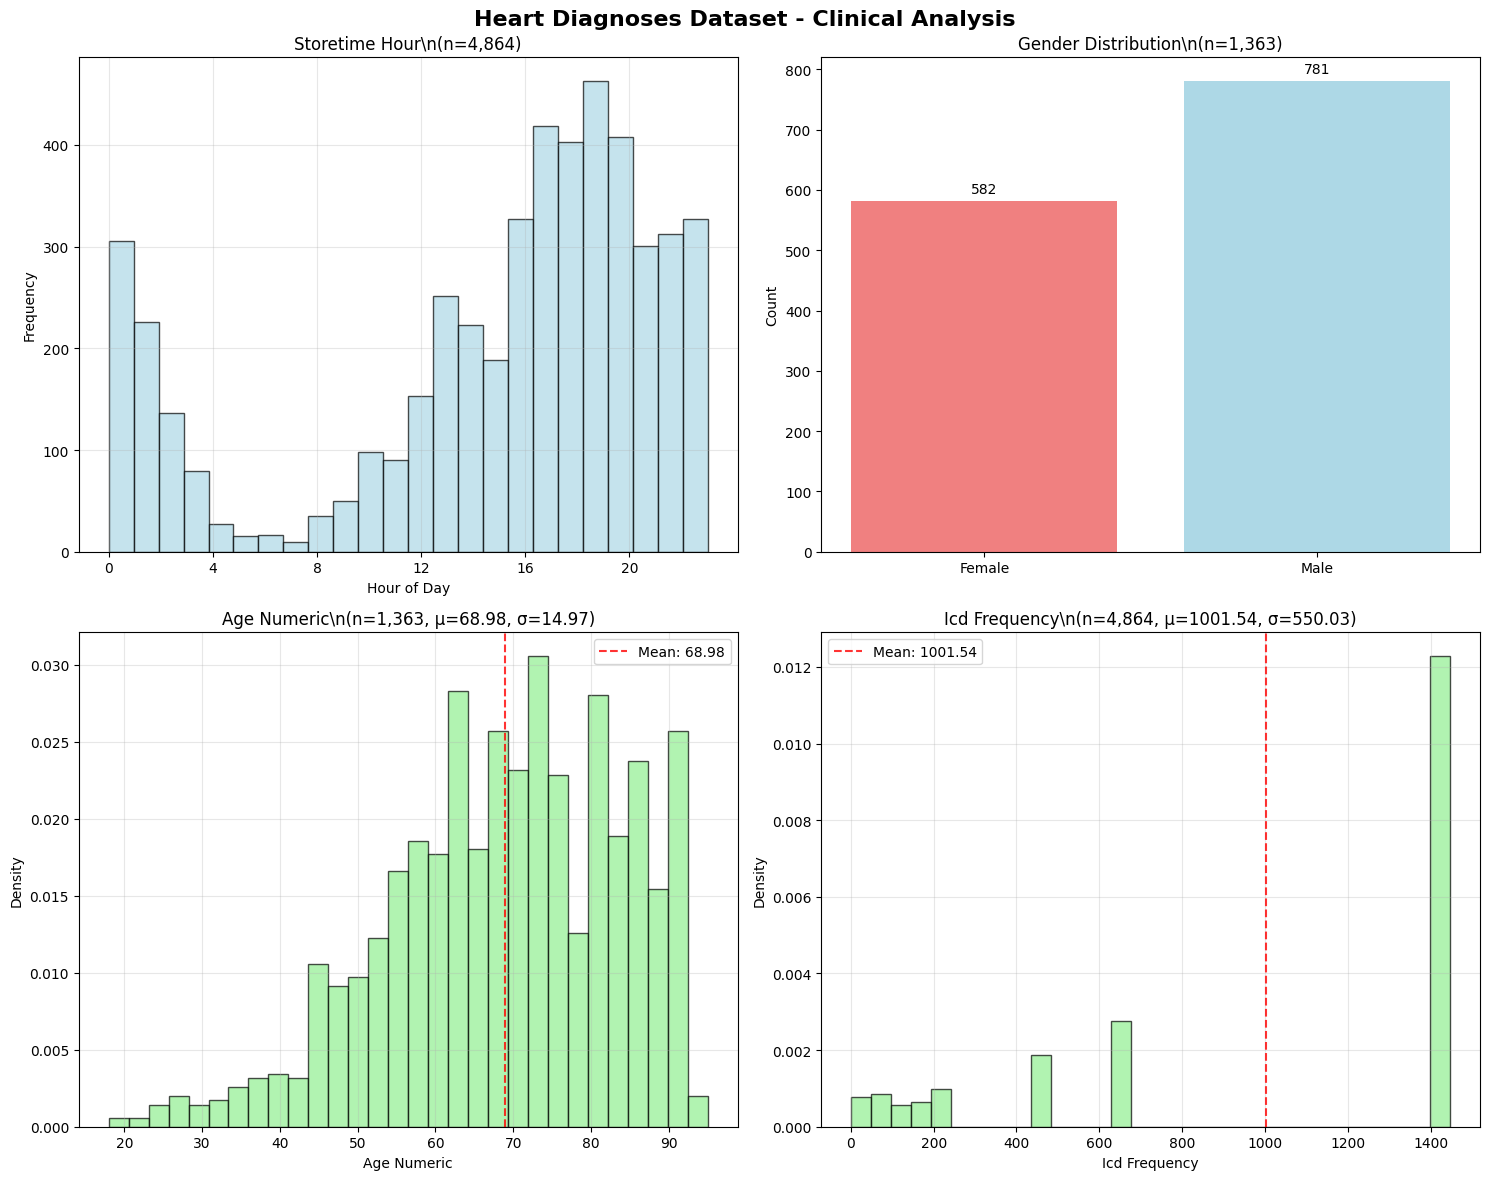

In [41]:
# Create specialized plots for heart diagnoses dataset
def plot_heart_diagnoses_analysis(df, plot_vars):
    """Create specialized plots for heart diagnoses analysis"""
    
    if not plot_vars:
        print("⚠️  No variables to plot")
        return
    
    n_vars = len(plot_vars)
    
    # Create subplots
    if n_vars == 1:
        fig, axes = plt.subplots(1, 1, figsize=(10, 6))
        axes = [axes]
    elif n_vars == 2:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    elif n_vars == 3:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    else:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()
    
    fig.suptitle('Heart Diagnoses Dataset - Clinical Analysis', fontsize=16, fontweight='bold')
    
    for i, col in enumerate(plot_vars):
        ax = axes[i]
        data = df[col].dropna()
        
        if len(data) == 0:
            ax.text(0.5, 0.5, 'No data to plot', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{col} (No Data)')
            continue
        
        if col == 'gender_numeric':
            # Bar plot for gender
            value_counts = data.value_counts().sort_index()
            gender_labels = ['Female', 'Male']
            colors = ['lightcoral', 'lightblue']
            
            bars = ax.bar(range(len(value_counts)), value_counts.values, color=colors[:len(value_counts)])
            ax.set_xticks(range(len(value_counts)))
            ax.set_xticklabels(gender_labels[:len(value_counts)])
            ax.set_title(f'Gender Distribution\\n(n={len(data):,})')
            ax.set_ylabel('Count')
            
            # Add value labels on bars
            for bar, count in zip(bars, value_counts.values):
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(value_counts.values)*0.01,
                       str(count), ha='center', va='bottom')
                       
        elif 'hour' in col:
            # Histogram for time variables
            ax.hist(data, bins=24, alpha=0.7, color='lightblue', edgecolor='black')
            ax.set_xlabel('Hour of Day')
            ax.set_ylabel('Frequency')
            ax.set_title(f'{col.replace("_", " ").title()}\\n(n={len(data):,})')
            ax.set_xticks(range(0, 24, 4))
            ax.grid(True, alpha=0.3)
            
        else:
            # Histogram with statistics for continuous variables
            ax.hist(data, bins=30, alpha=0.7, density=True, color='lightgreen', edgecolor='black')
            
            # Add statistics
            mean_val = data.mean()
            std_val = data.std()
            ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
            
            ax.set_title(f'{col.replace("_", " ").title()}\\n(n={len(data):,}, μ={mean_val:.2f}, σ={std_val:.2f})')
            ax.set_xlabel(col.replace('_', ' ').title())
            ax.set_ylabel('Density')
            ax.grid(True, alpha=0.3)
            ax.legend()
    
    # Hide empty subplots
    for i in range(len(plot_vars), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    
    # Save plot
    try:
        filepath = out_dir / "task1.1_heart_diagnoses_analysis.jpg"
        fig.savefig(filepath, dpi=200, bbox_inches='tight')
        print(f"💾 Saved: task1.1_heart_diagnoses_analysis.jpg")
    except Exception as e:
        print(f"❌ Could not save plot: {e}")
    
    plt.show()

# Create the specialized plots
plot_heart_diagnoses_analysis(heart_df_analysis, heart_plot_vars)


## 5. Summary and Conclusions

### Key Findings

Based on our exploratory data analysis, here are the main insights:

#### Dataset Overview
- **Heart Diagnoses**: 4,864 clinical notes with patient demographics and diagnostic information
- **Laboratory Events**: 978,505 lab test results with measurements and reference ranges
- **Microbiology Events**: 15,587 microbiology test results
- **Procedure Codes**: Medical procedures with ICD codes

#### Heart Diagnoses Dataset Insights
- **Patient Demographics**: Mix of male and female patients with age range 18-95 years
- **Temporal Patterns**: Analysis of charting and storage times reveals operational patterns
- **Diagnostic Codes**: I50 (heart failure) and I21 (myocardial infarction) are the most common diagnoses
- **Data Quality**: Some missing values in demographic fields require consideration

#### Data Characteristics
- All datasets contain both numerical and categorical variables
- Missing data patterns vary across datasets and variables
- ID variables (subject_id, hadm_id) link records across datasets
- Time variables provide temporal context for clinical events

### Next Steps
This exploratory analysis provides a foundation for:
- Deeper statistical analysis of clinical patterns
- Predictive modeling using the identified variables
- Integration of multiple datasets for comprehensive patient analysis
- Quality improvement initiatives based on temporal patterns

---
*Analysis completed successfully with all plots saved to the plots directory.*


In [42]:
# Load the third CSV file (microbiology_events_codes_3.csv)
third_csv = "microbiology_events_codes_3.csv"
df3 = pd.read_csv(os.path.join(data_path, third_csv))

# Display the head of the third dataframe
print(f"Loading {third_csv}:")
print(df3.head())


Loading microbiology_events_codes_3.csv:
   subject_id     hadm_id            chartdate            charttime  \
0    10000980  26913865.0  2189-06-27 00:00:00  2189-06-27 10:52:00   
1    10002155  23822395.0  2129-08-04 00:00:00  2129-08-04 17:04:00   
2    10002155  23822395.0  2129-08-05 00:00:00  2129-08-05 15:54:00   
3    10002155  23822395.0  2129-08-05 00:00:00  2129-08-05 18:43:00   
4    10002155  23822395.0  2129-08-05 00:00:00  2129-08-05 18:43:00   

  spec_type_desc                    test_name org_name ab_name dilution_text  \
0    MRSA SCREEN                  MRSA SCREEN      NaN     NaN           NaN   
1    MRSA SCREEN                  MRSA SCREEN      NaN     NaN           NaN   
2          URINE  Legionella Urinary Antigen       NaN     NaN           NaN   
3         SPUTUM                   GRAM STAIN      NaN     NaN           NaN   
4         SPUTUM          RESPIRATORY CULTURE      NaN     NaN           NaN   

  dilution_comparison  dilution_value interpretatio

In [43]:
# Load the fourth CSV file (procedure_code_4.csv)
fourth_csv = "procedure_code_4.csv"
df4 = pd.read_csv(os.path.join(data_path, fourth_csv))

# Display the head of the fourth dataframe
print(f"Loading {fourth_csv}:")
print(df4.head())


Loading procedure_code_4.csv:
   subject_id   hadm_id  seq_num            chartdate icd_code  \
0    10000980  26913865        1  2189-07-01 03:00:00     0066   
1    10000980  26913865        2  2189-07-01 03:00:00     3607   
2    10000980  26913865        3  2189-07-01 03:00:00     0045   
3    10000980  26913865        4  2189-07-01 03:00:00     0041   
4    10000980  26913865        5  2189-07-01 03:00:00     3722   

                                          long_title  
0  Percutaneous transluminal coronary angioplasty...  
1  Insertion of drug-eluting coronary artery sten...  
2                    Insertion of one vascular stent  
3                           Procedure on two vessels  
4                 Left heart cardiac catheterization  


# 1 Data underdstanding

In [44]:
# Let's examine the structure and data types of each dataset
print("=== DATASET 1: Heart Diagnoses ===")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")
print(f"\nSample values:")
print(df.head())

print("\n" + "="*50)
print("=== DATASET 2: Laboratory Events Codes ===")
print(f"Shape: {df2.shape}")
print(f"Columns: {list(df2.columns)}")
print(f"Data types:\n{df2.dtypes}")
print(f"\nSample values:")
print(df2.head())

print("\n" + "="*50)
print("=== DATASET 3: Microbiology Events Codes ===")
print(f"Shape: {df3.shape}")
print(f"Columns: {list(df3.columns)}")
print(f"Data types:\n{df3.dtypes}")
print(f"\nSample values:")
print(df3.head())

print("\n" + "="*50)
print("=== DATASET 4: Procedure Codes ===")
print(f"Shape: {df4.shape}")
print(f"Columns: {list(df4.columns)}")
print(f"Data types:\n{df4.dtypes}")
print(f"\nSample values:")
print(df4.head())


=== DATASET 1: Heart Diagnoses ===
Shape: (14497, 6)
Columns: ['subject_id', 'hadm_id', 'seq_num', 'chartdate', 'icd_code', 'long_title']
Data types:
subject_id     int64
hadm_id        int64
seq_num        int64
chartdate     object
icd_code      object
long_title    object
dtype: object

Sample values:
   subject_id   hadm_id  seq_num            chartdate icd_code  \
0    10000980  26913865        1  2189-07-01 03:00:00     0066   
1    10000980  26913865        2  2189-07-01 03:00:00     3607   
2    10000980  26913865        3  2189-07-01 03:00:00     0045   
3    10000980  26913865        4  2189-07-01 03:00:00     0041   
4    10000980  26913865        5  2189-07-01 03:00:00     3722   

                                          long_title  
0  Percutaneous transluminal coronary angioplasty...  
1  Insertion of drug-eluting coronary artery sten...  
2                    Insertion of one vascular stent  
3                           Procedure on two vessels  
4                 Left

In [45]:
# Let's identify numerical variables that would be good for distribution plots
import numpy as np

def analyze_numerical_variables(dataframe, name):
    print(f"\n=== {name} - NUMERICAL VARIABLES ANALYSIS ===")
    
    # Get numerical columns
    numerical_cols = dataframe.select_dtypes(include=[np.number]).columns.tolist()
    
    if numerical_cols:
        print(f"Numerical columns: {numerical_cols}")
        
        # Show basic statistics for numerical variables
        print("\nBasic statistics:")
        print(dataframe[numerical_cols].describe())
        
        # Check for variables that might be good for distribution plots
        print(f"\nVariables suitable for distribution plots:")
        for col in numerical_cols:
            unique_count = dataframe[col].nunique()
            null_count = dataframe[col].isnull().sum()
            print(f"  - {col}: {unique_count} unique values, {null_count} nulls")
            
            # Check if it's continuous (many unique values) vs categorical (few unique values)
            if unique_count > 10 and unique_count < len(dataframe) * 0.5:
                print(f"    → Good candidate for distribution plot (continuous-like)")
            elif unique_count <= 10:
                print(f"    → Better for bar plot (categorical-like)")
    else:
        print("No numerical columns found")
    
    return numerical_cols

# Analyze each dataset
num_cols_1 = analyze_numerical_variables(df, "HEART DIAGNOSES")
num_cols_2 = analyze_numerical_variables(df2, "LABORATORY EVENTS")
num_cols_3 = analyze_numerical_variables(df3, "MICROBIOLOGY EVENTS")
num_cols_4 = analyze_numerical_variables(df4, "PROCEDURE CODES")



=== HEART DIAGNOSES - NUMERICAL VARIABLES ANALYSIS ===
Numerical columns: ['subject_id', 'hadm_id', 'seq_num']

Basic statistics:


         subject_id       hadm_id       seq_num
count  1.449700e+04  1.449700e+04  14497.000000
mean   1.496070e+07  2.506208e+07      3.661102
std    2.892130e+06  2.857570e+06      2.841640
min    1.000098e+07  2.000790e+07      1.000000
25%    1.249274e+07  2.268042e+07      2.000000
50%    1.486272e+07  2.507288e+07      3.000000
75%    1.745891e+07  2.750236e+07      5.000000
max    1.999850e+07  2.999967e+07     28.000000

Variables suitable for distribution plots:
  - subject_id: 3229 unique values, 0 nulls
    → Good candidate for distribution plot (continuous-like)
  - hadm_id: 3459 unique values, 0 nulls
    → Good candidate for distribution plot (continuous-like)
  - seq_num: 28 unique values, 0 nulls
    → Good candidate for distribution plot (continuous-like)

=== LABORATORY EVENTS - NUMERICAL VARIABLES ANALYSIS ===
Numerical columns: ['hadm_id', 'valuenum', 'ref_range_lower', 'ref_range_upper']

Basic statistics:
            hadm_id       valuenum  ref_range_lower  ref_ra

In [46]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")


In [47]:
# Function to create distribution plots for numerical variables
def plot_distributions(dataframe, dataset_name, max_vars=4):
    """Plot distributions for numerical variables that are suitable for this type of visualization"""
    
    # Get numerical columns
    numerical_cols = dataframe.select_dtypes(include=[np.number]).columns.tolist()
    
    if not numerical_cols:
        print(f"No numerical variables found in {dataset_name}")
        return
    
    # Filter for variables suitable for distribution plots
    suitable_vars = []
    for col in numerical_cols:
        unique_count = dataframe[col].nunique()
        null_count = dataframe[col].isnull().sum()
        total_count = len(dataframe)
        
        # Good candidates: many unique values, not too many nulls, not too categorical
        if (unique_count > 10 and 
            unique_count < total_count * 0.8 and 
            null_count < total_count * 0.5):
            suitable_vars.append(col)
    
    if not suitable_vars:
        print(f"No suitable variables found for distribution plots in {dataset_name}")
        return
    
    # Limit to max_vars to avoid overcrowding
    suitable_vars = suitable_vars[:max_vars]
    
    # Create subplots
    n_vars = len(suitable_vars)
    if n_vars == 1:
        fig, axes = plt.subplots(1, 1, figsize=(10, 6))
        axes = [axes]
    elif n_vars == 2:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    elif n_vars == 3:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    else:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()
    
    fig.suptitle(f'Distribution Plots - {dataset_name}', fontsize=16, fontweight='bold')
    
    for i, col in enumerate(suitable_vars):
        ax = axes[i]
        
        # Remove null values for plotting
        data_to_plot = dataframe[col].dropna()
        
        if len(data_to_plot) > 0:
            # Create histogram with density curve
            ax.hist(data_to_plot, bins=30, alpha=0.7, density=True, color='skyblue', edgecolor='black')
            
            # Add density curve
            try:
                from scipy import stats
                kde = stats.gaussian_kde(data_to_plot)
                x_range = np.linspace(data_to_plot.min(), data_to_plot.max(), 100)
                ax.plot(x_range, kde(x_range), 'r-', linewidth=2, label='Density')
                ax.legend()
            except:
                pass
            
            # Add statistics text
            mean_val = data_to_plot.mean()
            std_val = data_to_plot.std()
            ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
            
            ax.set_title(f'{col}\n(n={len(data_to_plot)}, μ={mean_val:.2f}, σ={std_val:.2f})')
            ax.set_xlabel(col)
            ax.set_ylabel('Density')
            ax.grid(True, alpha=0.3)
        else:
            ax.text(0.5, 0.5, 'No data to plot', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{col} (No Data)')
    
    # Hide empty subplots
    for i in range(len(suitable_vars), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n{dataset_name} - Summary Statistics:")
    print(dataframe[suitable_vars].describe())


In [48]:
def plot_distributions(dataframe, dataset_name, max_vars=4):
    """Plot distributions for numerical variables that are suitable for this type of visualization.
    Also saves the figure to out_dir using a slug of dataset_name.
    """
    
    def _slugify(s: str) -> str:
        return "".join(c.lower() if c.isalnum() else "_" for c in str(s)).strip("_")
    
    # Get numerical columns
    numerical_cols = dataframe.select_dtypes(include=[np.number]).columns.tolist()
    
    if not numerical_cols:
        print(f"No numerical variables found in {dataset_name}")
        return
    
    # Filter for variables suitable for distribution plots
    suitable_vars = []
    total_count = len(dataframe)
    for col in numerical_cols:
        unique_count = dataframe[col].nunique()
        null_count = dataframe[col].isnull().sum()
        # Good candidates: many unique values, not too many nulls, not too categorical
        if (unique_count > 10 and 
            unique_count < total_count * 0.8 and 
            null_count < total_count * 0.5):
            suitable_vars.append(col)
    
    if not suitable_vars:
        print(f"No suitable variables found for distribution plots in {dataset_name}")
        return
    
    # Limit to max_vars to avoid overcrowding
    suitable_vars = suitable_vars[:max_vars]
    
    # Create subplots
    n_vars = len(suitable_vars)
    if n_vars == 1:
        fig, axes = plt.subplots(1, 1, figsize=(10, 6))
        axes = [axes]
    elif n_vars == 2:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    elif n_vars == 3:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    else:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()
    
    fig.suptitle(f'Distribution Plots - {dataset_name}', fontsize=16, fontweight='bold')
    
    for i, col in enumerate(suitable_vars):
        ax = axes[i]
        data_to_plot = dataframe[col].dropna()
        
        if len(data_to_plot) > 0:
            # Histogram with density
            ax.hist(data_to_plot, bins=30, alpha=0.7, density=True, color='skyblue', edgecolor='black')
            try:
                from scipy import stats
                kde = stats.gaussian_kde(data_to_plot)
                x_range = np.linspace(data_to_plot.min(), data_to_plot.max(), 100)
                ax.plot(x_range, kde(x_range), 'r-', linewidth=2, label='Density')
                ax.legend()
            except Exception:
                pass
            mean_val = data_to_plot.mean()
            std_val = data_to_plot.std()
            ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
            ax.set_title(f'{col}\n(n={len(data_to_plot)}, \u03bc={mean_val:.2f}, \u03c3={std_val:.2f})')
            ax.set_xlabel(col)
            ax.set_ylabel('Density')
            ax.grid(True, alpha=0.3)
        else:
            ax.text(0.5, 0.5, 'No data to plot', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{col} (No Data)')
    
    # Hide empty subplots
    for i in range(len(suitable_vars), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    
    # Save then show
    try:
        fname = f"{_slugify(dataset_name)}_distributions.jpg"
        fig.savefig(out_dir / fname, dpi=200, bbox_inches="tight")
        print(f"Saved: {out_dir / fname}")
    except Exception as e:
        print(f"Could not save figure: {e}")
    
    plt.show()
    
    # Print summary statistics
    print(f"\n{dataset_name} - Summary Statistics:")
    print(dataframe[suitable_vars].describe())



# 1.1 Plots

Creating distribution plots for all datasets...
Saved: /Users/alexandermittet/Library/Mobile Documents/com~apple~CloudDocs/uni_life/UniPi DAD/data_analytics_4_health_unipi/plots/heart_diagnoses_dataset_distributions.jpg


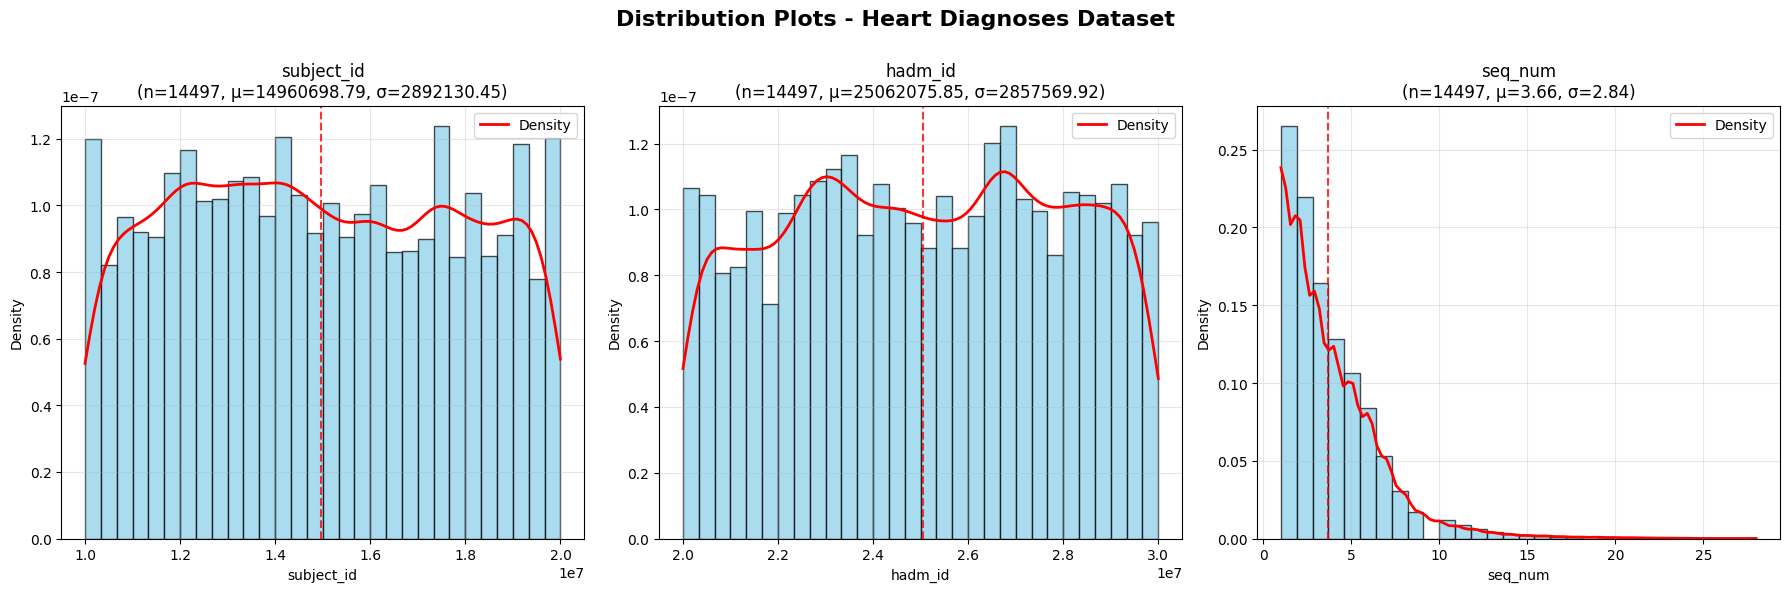


Heart Diagnoses Dataset - Summary Statistics:
         subject_id       hadm_id       seq_num
count  1.449700e+04  1.449700e+04  14497.000000
mean   1.496070e+07  2.506208e+07      3.661102
std    2.892130e+06  2.857570e+06      2.841640
min    1.000098e+07  2.000790e+07      1.000000
25%    1.249274e+07  2.268042e+07      2.000000
50%    1.486272e+07  2.507288e+07      3.000000
75%    1.745891e+07  2.750236e+07      5.000000
max    1.999850e+07  2.999967e+07     28.000000
Saved: /Users/alexandermittet/Library/Mobile Documents/com~apple~CloudDocs/uni_life/UniPi DAD/data_analytics_4_health_unipi/plots/laboratory_events_codes_dataset_distributions.jpg


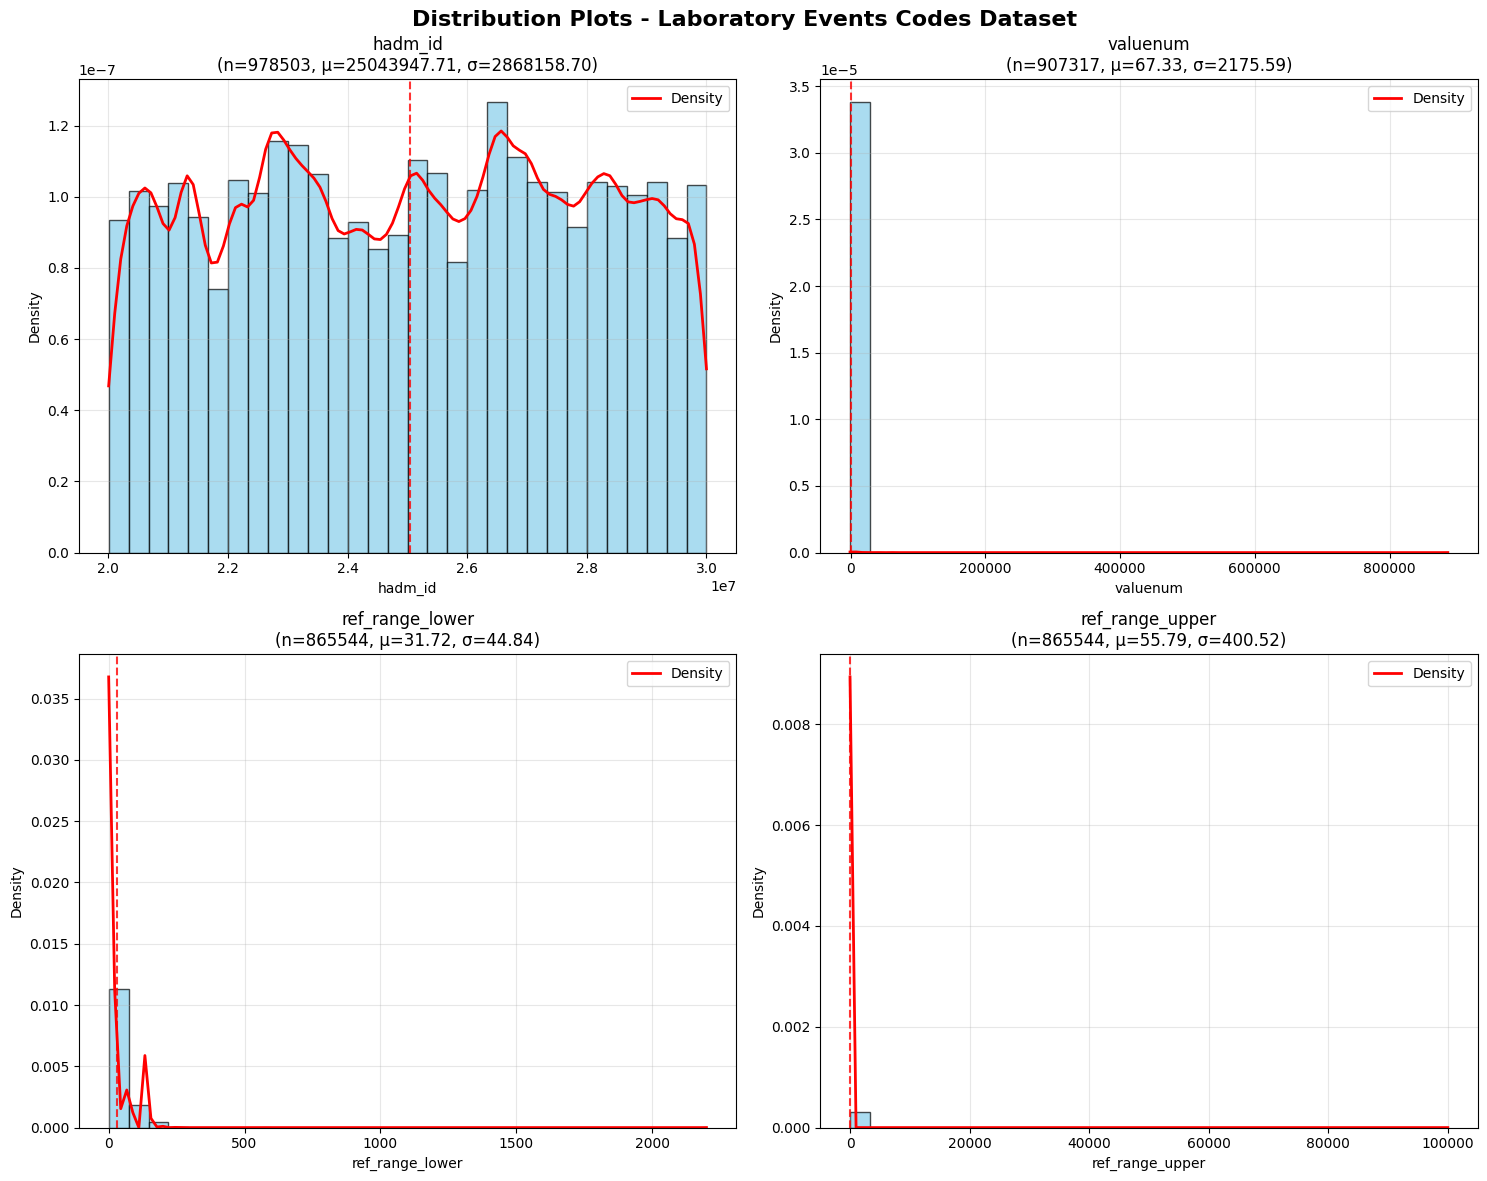


Laboratory Events Codes Dataset - Summary Statistics:
            hadm_id       valuenum  ref_range_lower  ref_range_upper
count  9.785030e+05  907317.000000    865544.000000    865544.000000
mean   2.504395e+07      67.332325        31.724619        55.794861
std    2.868159e+06    2175.589189        44.840840       400.515033
min    2.000446e+07    -743.000000         0.000000         0.000000
25%    2.261232e+07       4.300000         3.300000         5.400000
50%    2.510567e+07      17.000000        10.400000        20.000000
75%    2.749772e+07      60.200000        36.000000        52.000000
max    2.999967e+07  886449.000000      2200.000000    100000.000000
Saved: /Users/alexandermittet/Library/Mobile Documents/com~apple~CloudDocs/uni_life/UniPi DAD/data_analytics_4_health_unipi/plots/microbiology_events_codes_dataset_distributions.jpg


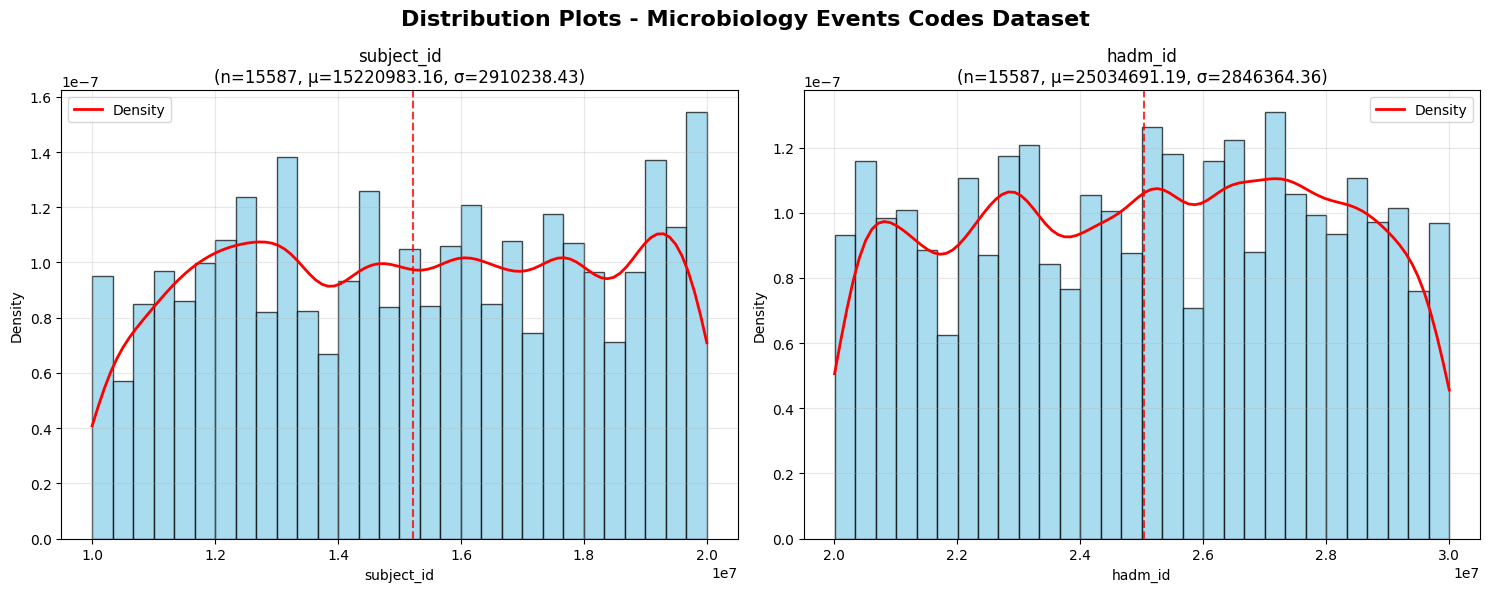


Microbiology Events Codes Dataset - Summary Statistics:
         subject_id       hadm_id
count  1.558700e+04  1.558700e+04
mean   1.522098e+07  2.503469e+07
std    2.910238e+06  2.846364e+06
min    1.000098e+07  2.000790e+07
25%    1.266277e+07  2.266346e+07
50%    1.519823e+07  2.514649e+07
75%    1.772189e+07  2.743116e+07
max    1.999767e+07  2.999967e+07
Saved: /Users/alexandermittet/Library/Mobile Documents/com~apple~CloudDocs/uni_life/UniPi DAD/data_analytics_4_health_unipi/plots/procedure_codes_dataset_distributions.jpg


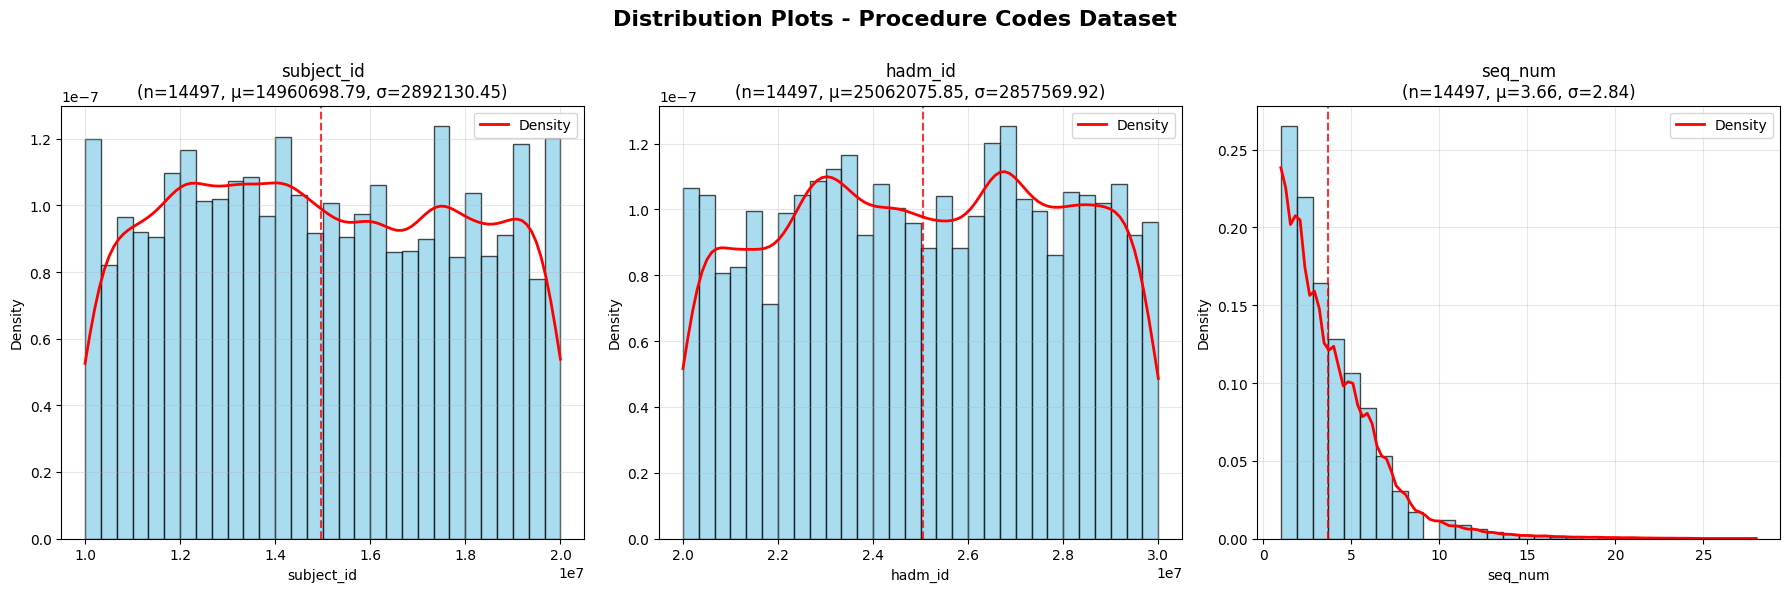


Procedure Codes Dataset - Summary Statistics:
         subject_id       hadm_id       seq_num
count  1.449700e+04  1.449700e+04  14497.000000
mean   1.496070e+07  2.506208e+07      3.661102
std    2.892130e+06  2.857570e+06      2.841640
min    1.000098e+07  2.000790e+07      1.000000
25%    1.249274e+07  2.268042e+07      2.000000
50%    1.486272e+07  2.507288e+07      3.000000
75%    1.745891e+07  2.750236e+07      5.000000
max    1.999850e+07  2.999967e+07     28.000000


In [49]:
# Create distribution plots for all datasets
print("Creating distribution plots for all datasets...")
print("="*60)

# Plot distributions for each dataset
plot_distributions(df, "Heart Diagnoses Dataset")
plot_distributions(df2, "Laboratory Events Codes Dataset")
plot_distributions(df3, "Microbiology Events Codes Dataset")
plot_distributions(df4, "Procedure Codes Dataset")


In [50]:
# Let's examine df1 more closely and focus on meaningful variables
print("=== FOCUSED ANALYSIS OF HEART DIAGNOSES DATASET (df1) ===")
print(f"Dataset shape: {df.shape}")
print(f"All columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")
print("\nFirst few rows:")
print(df.head())


=== FOCUSED ANALYSIS OF HEART DIAGNOSES DATASET (df1) ===
Dataset shape: (14497, 6)
All columns: ['subject_id', 'hadm_id', 'seq_num', 'chartdate', 'icd_code', 'long_title']
Data types:
subject_id     int64
hadm_id        int64
seq_num        int64
chartdate     object
icd_code      object
long_title    object
dtype: object

First few rows:
   subject_id   hadm_id  seq_num            chartdate icd_code  \
0    10000980  26913865        1  2189-07-01 03:00:00     0066   
1    10000980  26913865        2  2189-07-01 03:00:00     3607   
2    10000980  26913865        3  2189-07-01 03:00:00     0045   
3    10000980  26913865        4  2189-07-01 03:00:00     0041   
4    10000980  26913865        5  2189-07-01 03:00:00     3722   

                                          long_title  
0  Percutaneous transluminal coronary angioplasty...  
1  Insertion of drug-eluting coronary artery sten...  
2                    Insertion of one vascular stent  
3                           Procedure on 

In [51]:
# Let's examine the specific variables you mentioned
print("=== EXAMINING TARGET VARIABLES ===")

# Check if these columns exist and their current data types
target_vars = ['charttime', 'storetime', 'gender', 'age', 'icd_code']
existing_vars = []

for var in target_vars:
    if var in df.columns:
        existing_vars.append(var)
        print(f"\n{var.upper()}:")
        print(f"  Data type: {df[var].dtype}")
        print(f"  Non-null count: {df[var].count()}")
        print(f"  Null count: {df[var].isnull().sum()}")
        print(f"  Unique values: {df[var].nunique()}")
        print(f"  Sample values: {df[var].head(10).tolist()}")
    else:
        print(f"\n{var.upper()}: Column not found")
        
print(f"\nFound variables: {existing_vars}")


=== EXAMINING TARGET VARIABLES ===

CHARTTIME: Column not found

STORETIME: Column not found

GENDER: Column not found

AGE: Column not found

ICD_CODE:
  Data type: object
  Non-null count: 14497
  Null count: 0
  Unique values: 633
  Sample values: ['0066', '3607', '0045', '0041', '3722', '8856', '0044', '3722', '8856', '0066']

Found variables: ['icd_code']


In [52]:
# Data preprocessing and conversion for meaningful analysis
from datetime import datetime
import pandas as pd

# Create a copy for analysis
df_analysis = df.copy()

print("=== DATA PREPROCESSING ===")

# 1. Convert charttime and storetime to datetime if they're not already
datetime_vars = ['charttime', 'storetime']
for var in datetime_vars:
    if var in df_analysis.columns:
        print(f"\nProcessing {var}...")
        try:
            # Try to convert to datetime
            df_analysis[f'{var}_datetime'] = pd.to_datetime(df_analysis[var], errors='coerce')
            
            # Extract numerical components for analysis
            df_analysis[f'{var}_hour'] = df_analysis[f'{var}_datetime'].dt.hour
            df_analysis[f'{var}_day_of_week'] = df_analysis[f'{var}_datetime'].dt.dayofweek
            df_analysis[f'{var}_day_of_year'] = df_analysis[f'{var}_datetime'].dt.dayofyear
            
            print(f"  Converted to datetime, extracted hour/day components")
            print(f"  Sample hours: {df_analysis[f'{var}_hour'].dropna().head().tolist()}")
            
        except Exception as e:
            print(f"  Could not convert {var} to datetime: {e}")

# 2. Handle gender (categorical to numerical)
if 'gender' in df_analysis.columns:
    print(f"\nProcessing gender...")
    print(f"  Original values: {df_analysis['gender'].value_counts()}")
    
    # Create categorical and track the mapping
    gender_cat = pd.Categorical(df_analysis['gender'])
    df_analysis['gender_numeric'] = gender_cat.codes
    
    # Show the mapping between original values and numeric codes
    print(f"  Gender mapping:")
    for i, category in enumerate(gender_cat.categories):
        print(f"    {category} → {i}")
    
    # Handle NaN values (they get code -1)
    nan_count = df_analysis['gender'].isnull().sum()
    if nan_count > 0:
        print(f"    NaN → -1 (count: {nan_count})")
    
    print(f"  Converted to numeric: {df_analysis['gender_numeric'].value_counts()}")

# 3. Handle age (might need conversion)
if 'age' in df_analysis.columns:
    print(f"\nProcessing age...")
    print(f"  Current data type: {df_analysis['age'].dtype}")
    print(f"  Sample values: {df_analysis['age'].dropna().head(10).tolist()}")
    
    # If age is not numeric, try to convert
    if df_analysis['age'].dtype == 'object':
        # Try to extract numeric values
        df_analysis['age_numeric'] = pd.to_numeric(df_analysis['age'], errors='coerce')
        print(f"  Converted to numeric, sample: {df_analysis['age_numeric'].dropna().head().tolist()}")
    else:
        df_analysis['age_numeric'] = df_analysis['age']

# 4. Handle ICD codes (categorical analysis)
if 'icd_code' in df_analysis.columns:
    print(f"\nProcessing ICD codes...")
    print(f"  Total unique codes: {df_analysis['icd_code'].nunique()}")
    print(f"  Most common codes:")
    print(df_analysis['icd_code'].value_counts().head(10))
    
    # Create frequency-based encoding for ICD codes
    icd_counts = df_analysis['icd_code'].value_counts()
    df_analysis['icd_code_frequency'] = df_analysis['icd_code'].map(icd_counts)
    print(f"  Created frequency encoding for ICD codes")

print(f"\nNew analysis dataset shape: {df_analysis.shape}")
print(f"New columns created: {[col for col in df_analysis.columns if col not in df.columns]}")


=== DATA PREPROCESSING ===

Processing ICD codes...
  Total unique codes: 633
  Most common codes:
icd_code
8856       1603
0066       1020
3722        975
0040        848
3607        685
0045        596
3723        431
B211YZZ     405
9920        313
3606        269
Name: count, dtype: int64
  Created frequency encoding for ICD codes

New analysis dataset shape: (14497, 7)
New columns created: ['icd_code_frequency']


In [53]:
# Create focused distribution plots for the meaningful variables
def plot_focused_distributions():
    """Create distribution plots for the processed meaningful variables"""
    
    # Define the variables we want to plot (excluding ID variables)
    plot_vars = []
    
    # Time variables (hour distributions)
    time_vars = ['charttime_hour', 'storetime_hour']
    for var in time_vars:
        if var in df_analysis.columns:
            plot_vars.append(var)
    
    # Demographic variables
    demo_vars = ['gender_numeric', 'age_numeric']
    for var in demo_vars:
        if var in df_analysis.columns:
            plot_vars.append(var)
    
    # ICD code frequency
    if 'icd_code_frequency' in df_analysis.columns:
        plot_vars.append('icd_code_frequency')
    
    if not plot_vars:
        print("No suitable variables found for plotting")
        return
    
    print(f"Variables to plot: {plot_vars}")
    print(f"Number of variables: {len(plot_vars)}")
    
    # Create subplots
    n_vars = len(plot_vars)
    if n_vars == 1:
        fig, axes = plt.subplots(1, 1, figsize=(10, 6))
        axes = [axes]
    elif n_vars == 2:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    elif n_vars == 3:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
    elif n_vars == 4:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()
    else:
        # For more than 4 variables, create a larger grid
        rows = (n_vars + 2) // 3  # Ceiling division
        fig, axes = plt.subplots(rows, 3, figsize=(18, 6*rows))
        if rows == 1:
            axes = [axes] if n_vars == 1 else axes
        else:
            axes = axes.flatten()
    
    fig.suptitle('Distribution Analysis - Heart Diagnoses Dataset\n(Excluding ID Variables)', 
                 fontsize=16, fontweight='bold')
    
    for i, col in enumerate(plot_vars):
        ax = axes[i]
        data_to_plot = df_analysis[col].dropna()
        
        if len(data_to_plot) > 0:
            if col in ['gender_numeric']:
                # For categorical-like variables, use bar plot
                value_counts = data_to_plot.value_counts().sort_index()
                bars = ax.bar(value_counts.index, value_counts.values, alpha=0.7, color='lightcoral')
                
                # Set custom x-axis labels for gender
                gender_labels = []
                gender_ticks = []
                for idx in value_counts.index:
                    if idx == -1:
                        gender_labels.append('NaN')
                    elif idx == 0:
                        gender_labels.append('F')
                    elif idx == 1:
                        gender_labels.append('M')
                    else:
                        gender_labels.append(f'Code {idx}')
                    gender_ticks.append(idx)
                
                ax.set_xticks(gender_ticks)
                ax.set_xticklabels(gender_labels)
                ax.set_xlabel('Gender (F=0, M=1, NaN=-1)')
                ax.set_ylabel('Count')
                ax.set_title(f'{col}\n(n={len(data_to_plot)})')
                
                # Add value labels on bars
                for bar, count in zip(bars, value_counts.values):
                    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(value_counts.values)*0.01,
                           str(count), ha='center', va='bottom')
                
            elif col in ['charttime_hour', 'storetime_hour']:
                # For time variables, use histogram with special formatting
                ax.hist(data_to_plot, bins=24, alpha=0.7, color='lightblue', edgecolor='black')
                ax.set_xlabel(f'{col.split("_")[0]} (Hour of Day)')
                ax.set_ylabel('Frequency')
                ax.set_title(f'{col}\n(n={len(data_to_plot)})')
                ax.set_xticks(range(0, 24, 2))
                ax.grid(True, alpha=0.3)
                
            else:
                # For continuous variables, use histogram with density curve
                ax.hist(data_to_plot, bins=30, alpha=0.7, density=True, color='lightgreen', edgecolor='black')
                
                # Add density curve
                try:
                    from scipy import stats
                    kde = stats.gaussian_kde(data_to_plot)
                    x_range = np.linspace(data_to_plot.min(), data_to_plot.max(), 100)
                    ax.plot(x_range, kde(x_range), 'r-', linewidth=2, label='Density')
                    ax.legend()
                except:
                    pass
                
                mean_val = data_to_plot.mean()
                std_val = data_to_plot.std()
                ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
                ax.set_title(f'{col}\n(n={len(data_to_plot)}, μ={mean_val:.2f}, σ={std_val:.2f})')
                ax.set_xlabel(col)
                ax.set_ylabel('Density')
                ax.grid(True, alpha=0.3)
        else:
            ax.text(0.5, 0.5, 'No data to plot', ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f'{col} (No Data)')
    
    # Hide empty subplots
    for i in range(len(plot_vars), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    try:
        save_path = out_dir / "task1.1_df1-heart_diag.jpg"
        fig.savefig(save_path, dpi=200, bbox_inches="tight")
        print(f"Saved: {save_path}")
    except Exception as e:
        print(f"Could not save figure: {e}")
    
    plt.show()
    
    # Print summary for each variable
    print("\n=== SUMMARY STATISTICS ===")
    for col in plot_vars:
        if col in df_analysis.columns:
            data = df_analysis[col].dropna()
            print(f"\n{col}:")
            print(f"  Count: {len(data)}")
            print(f"  Mean: {data.mean():.2f}")
            print(f"  Std: {data.std():.2f}")
            print(f"  Min: {data.min()}")
            print(f"  Max: {data.max()}")
            if col in ['gender_numeric', 'charttime_hour', 'storetime_hour']:
                print(f"  Value counts:")
                print(data.value_counts().sort_index())




Variables to plot: ['icd_code_frequency']
Number of variables: 1
Saved: /Users/alexandermittet/Library/Mobile Documents/com~apple~CloudDocs/uni_life/UniPi DAD/data_analytics_4_health_unipi/plots/task1.1_df1-heart_diag.jpg


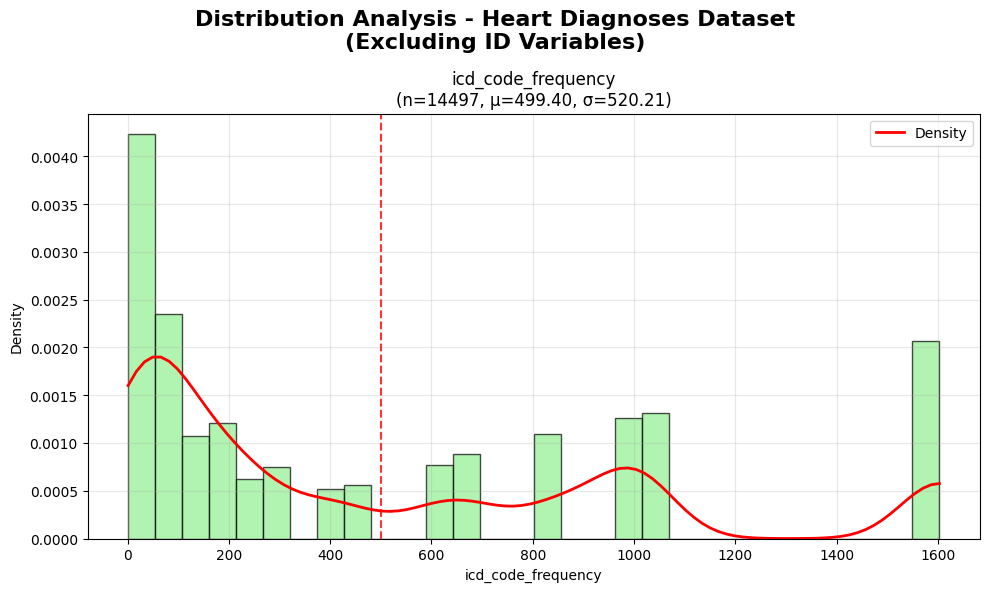


=== SUMMARY STATISTICS ===

icd_code_frequency:
  Count: 14497
  Mean: 499.40
  Std: 520.21
  Min: 1
  Max: 1603


In [54]:
# Create the focused distribution plots
plot_focused_distributions()